<a href="https://colab.research.google.com/github/Anveshkh/Scikit-learn_ml_model/blob/master/Scikit_learn_Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
what_were_covering = [
    '0. An end-to-end Scikit Learn workflow',
    '1. Getting the data ready',
    '2. Choose the right estimator/algorithm for our problems',
    '3. Fit the model/algorithm and use it to make prediction on our data',
    '4. Evaluating a model',
    '5. Improve a model',
    '6. Save and load a trained model',
    '7. Putting it all together'
]

In [2]:
what_were_covering

['0. An end-to-end Scikit Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make prediction on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together']

# 2 Choosing the right estimator/model/algorithm for our problem

Sklearn refers to machine learning models, algorithms as **Estimators**

1. Classification problem - predicting a category (heart disease or not).
2. Sometimes you'll see `clf` (short for classifier)
3. Regression problem - predicting a number(selling price of a car).

# 2.1 Picking a machine learning model for a regression problem

Let's use a California Housing dataset.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
# Create the data

X = housing_df.drop("target", axis=1)
Y = housing_df["target"]

# Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model on the test set
model.score(X_test, y_test)

0.6018513691825297

## Trying Lasso Machine Learning **model**

In [8]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
# Create the data
X = housing_df.drop("target", axis=1)
Y = housing_df["target"]

# Spliting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

# Fitting our model with training data
model = Lasso()
model.fit(X_train, y_train)

model.score(X_test, y_test)


0.29008534431825095

So this ML Model is not working so no features should be that important

# Trying RandomForestRegressor from Ensemble

In [9]:
# Trying another model 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Creating the data
X = housing_df.drop("target", axis=1)
Y = housing_df["target"]

# Creating our model
model = RandomForestRegressor()

# Splitting our data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Fitting our model with training data
model.fit(X_train, y_train)

# Calulating score of our model on test data it has never seen before
model.score(X_test, y_test)

0.8116911442238643

## **2.2 Picking a machine learning model for classification**


In [10]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [11]:
## Consulting the map and it says to try linearSVC

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

# Create the data
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

# Split our data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

# Train our model on the training data

model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model
model.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7377049180327869

Compare this model with RandomForestClassifier of Ensemble models

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

# Split the data in train and test

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Fit the data to the model
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

# Evaluate the model on the test data
clf.score(X_test, y_test)

0.7540983606557377

Tidbit: 
1. If you have structured data, use ensemble methods
2. If you have unstructured data, use deep learning or transfer learning 

# **3. Fit the model/algorithm on our data and use it to make predictions **

3.1 Fitting the model to the data

`X` = features, feature variables, data
`Y` = labels, targets, target variables

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

# Split the data in train and test

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Fit the data to the model
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

# Evaluate the model on the test data
clf.score(X_test, y_test)

0.8032786885245902

# 3.2 Make predictions using a machine learning model

2 ways to make prediction:
1. predict()
2. predict_proba()

In [14]:
clf.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
np.array(y_test)

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1])

In [16]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8032786885245902

In [17]:
clf.score(X_test, y_test)

0.8032786885245902

Internal Working of score function
1. Score function takes X_test, and output of X_test that is y_test
2. First it calculate the y_preds by taking X_test. it calculates y_preds by using the patterns that it had learned from training data.
3. After calculating y_preds it compares this data with y_test and according to that returns us a score.

clf.score(X_test, y_test) -> clf.predict(X_test) compare this with (y_test)

In [18]:
# 1st way

y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8032786885245902

In [19]:
# 2nd way
clf.score(X_test, y_test)

0.8032786885245902

In [20]:
# 3rd way
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

0.8032786885245902

## Make predictions with `predict_proba()`

In [21]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])


array([[0.96, 0.04],
       [0.03, 0.97],
       [0.79, 0.21],
       [0.67, 0.33],
       [0.73, 0.27]])

In [22]:
# This output says that there is 
"""
1. 0.12 percent chance that the output is 0 and 0.88 percent chance that the output is 1
2. 0.44 percent chance that the output is 0 and 0.56 percent chance that the output is 1
3. 0.24 percent chance that the output is 0 and 0.76 percent chance that the output is 1 
"""

'\n1. 0.12 percent chance that the output is 0 and 0.88 percent chance that the output is 1\n2. 0.44 percent chance that the output is 0 and 0.56 percent chance that the output is 1\n3. 0.24 percent chance that the output is 0 and 0.76 percent chance that the output is 1 \n'

In [23]:
clf.predict(X_test[:5])

array([0, 1, 0, 0, 0])

In [24]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [25]:
from sklearn.ensemble import RandomForestRegressor

# Create the data
X = housing_df.drop("target", axis=1)
Y = housing_df["target"]

# Split into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# fit the model to the train data
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)
y_preds

array([2.24081  , 1.41378  , 2.9980807, ..., 2.2373203, 1.70866  ,
       4.1210627])

In [26]:
y_preds[:10]

array([2.24081  , 1.41378  , 2.9980807, 0.80829  , 1.19821  , 1.90441  ,
       2.3762608, 0.95975  , 2.8334904, 2.49487  ])

In [27]:
np.array(y_test[:10])
# y_test is the actual answer
# y_preds is the predicted answer

array([2.027, 1.243, 3.424, 0.702, 0.979, 1.813, 2.35 , 0.924, 4.075,
       2.436])

In [28]:
len(y_preds), len(y_test)

(4128, 4128)

In [29]:
model.score(X_test, y_test)

0.8242629320242163

In [30]:
# Compare the predictions to the truth

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.31399615622577537

this simply means that on average each one of our model's predictions is 0.33 points different than the actual test value

# 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
 1. Estimators's built-in `score()` method
 2. The `scoring` parameter
 3. Problem-specific metric functions which are different for regression problem, classification problem etc

4.1 Evaluating a model with the score method


In [31]:
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)


RandomForestClassifier()

In [32]:
clf.score(X_train, y_train)

1.0

In [33]:
clf.score(X_test, y_test)

0.7704918032786885

4.2 Evaluating a model using the scoring parameter

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
cross_val_score(clf, X, Y, cv = 5)

array([0.83606557, 0.90163934, 0.80327869, 0.8       , 0.76666667])

In [36]:
np.mean(cross_val_score(clf, X, Y, cv = 15))

0.8382539682539683

In [37]:
# Single training and test split
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, Y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.819672131147541, 0.8313661202185791)

In [38]:
# Scoring parameter set to null by default
cross_val_score(clf, X, Y, cv = 5, scoring=None)
# If the scoring parameter of cross_val_score is None it uses the default scoring parameter of the model
# or estimator
# Here default scoring parameter of classifier is mean accuracy


array([0.83606557, 0.8852459 , 0.80327869, 0.8       , 0.73333333])

# 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

## **Accuracy**

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

cross_val_score = cross_val_score(clf, X, Y, cv=5)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [40]:
np.mean(cross_val_score)

0.8248087431693989

In [41]:
print(f"Heart Disease Classifier Cross-validated Accuracy : {np.mean(cross_val_score) * 100 :.2f}%")

Heart Disease Classifier Cross-validated Accuracy : 82.48%


Area under the receiver operating characteristic curve(AUC/ROC)

. Area under curve(AOC),
. ROC curve



ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).


1. True positive = model predicts 1 when truth is 1
2. False positive = model predicts 1 when truth is 0
3. True negative = model predicts 0 when truth is 0
4. False negative = model predicts 0 when truth is 1

In [55]:
# Create training data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probablities
y_probs = clf.predict_proba(X_test)

y_probs[:10]


array([[0.34, 0.66],
       [0.3 , 0.7 ],
       [0.56, 0.44],
       [0.11, 0.89],
       [0.38, 0.62],
       [0.7 , 0.3 ],
       [0.95, 0.05],
       [0.25, 0.75],
       [0.39, 0.61],
       [0.05, 0.95]])

In [57]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.66, 0.7 , 0.44, 0.89, 0.62, 0.3 , 0.05, 0.75, 0.61, 0.95])

In [59]:
from sklearn.metrics import roc_curve
# Calculate fpr, tpr, threshold
fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03703704, 0.03703704, 0.11111111, 0.11111111, 0.11111111,
       0.25925926, 0.25925926, 0.40740741, 0.55555556, 0.62962963,
       0.66666667, 0.74074074, 0.88888889, 0.96296296, 1.        ])

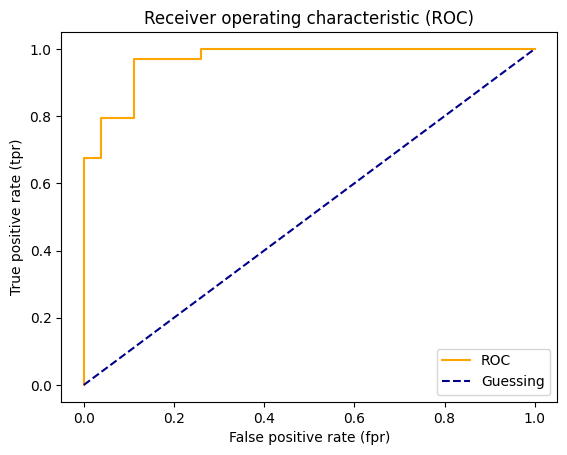

In [61]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
  """
  Plots our ROC curve given our false positive rate and true positive rate
  """
  # Plots roc curve
  plt.plot(fpr, tpr, color="orange", label="ROC")

  # Plot line with no predictive power(baseline)

  plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")

  # Customize the plot
  plt.xlabel("False positive rate (fpr)")
  plt.ylabel("True positive rate (tpr)")

  plt.title("Receiver operating characteristic (ROC)")
  plt.legend()
  plt.show()

plot_roc_curve(fpr, tpr)


In [62]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9684095860566448